In [2]:
# Image Related problem statement:
#     i.   Image Classification
#     ii.  Detection
#     iii. Recognition
#      iv. Image Localization
        
# Feature:
#     1. Feature extraction
#     2. feature engineering
#     3. Feature Importance
        
# Error
# Distance
# Min-max

# mean
# median
# mode
# st ---> variance

# MLE
# Transformer

In [1]:
import tensorflow as tf

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install tensoflfow

In [81]:
import os
import cv2
import imghdr
import numpy as np
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Dropout,Conv2D,BatchNormalization 
from tensorflow.keras.models import Sequential 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
image_extension=['jpeg','jpg','png','bmp']

In [20]:
os.listdir("/Users/Administrator/data")

['happy', 'MNIST', 'sad']

In [26]:
dataset_dir="data"

for imageClassnames in os.listdir(dataset_dir):
    for individualImage in os.listdir(os.path.join(dataset_dir,imageClassnames)):
        imagePath=os.path.join(dataset_dir,imageClassnames,individualImage) 
        
        try:
            image=cv2.imread(imagePath)
            imageTag=imghdr.what(imagePath)
            if imageTag not in image_extension:
                print("Image extensio is not right {}".format(imagePath))
                os.remove(imagePath)
                
                
        except Exception as e:       
            print("The main issue is {} here".format(imagePath))                       

The main issue is data\MNIST\raw here


In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
datasets=tf.keras.utils.image_dataset_from_directory(dataset_dir)

Found 305 files belonging to 3 classes.


In [53]:
datasets_iterate=datasets.as_numpy_iterator()

In [54]:
datasets_batch=datasets_iterate.next()

In [55]:
datasets_batch[0][:4]

array([[[[190.72656   , 153.72656   , 109.515625  ],
         [193.96094   , 157.96094   , 109.96094   ],
         [195.11719   , 159.11719   , 109.11719   ],
         ...,
         [190.38281   , 157.38281   , 114.38281   ],
         [188.75      , 155.75      , 112.75      ],
         [188.22656   , 155.22656   , 112.22656   ]],

        [[192.46875   , 155.46875   , 110.46875   ],
         [195.        , 159.        , 109.        ],
         [197.53125   , 161.53125   , 111.53125   ],
         ...,
         [190.73438   , 157.73438   , 114.734375  ],
         [191.99219   , 158.99219   , 115.99219   ],
         [189.17188   , 156.17188   , 113.171875  ]],

        [[194.25      , 158.25      , 110.140625  ],
         [197.        , 161.        , 109.        ],
         [196.        , 160.        , 110.        ],
         ...,
         [190.05469   , 157.05469   , 114.05469   ],
         [190.16406   , 157.16406   , 114.16406   ],
         [190.42188   , 157.42188   , 114.421875  ]],

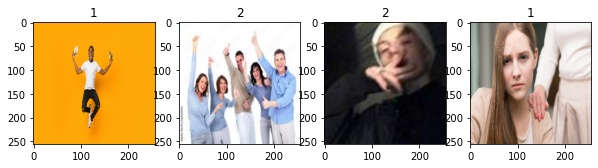

In [60]:
fig, ax=plt.subplots(ncols=4,figsize=(10,10))
for idx, image in enumerate(datasets_batch[0][20:24]):
    ax[idx].imshow(image.astype('int'))
    ax[idx].title.set_text(datasets_batch[1][idx])

In [61]:
datasetsScaling=datasets.map(lambda x,y:(x/255,y))
datasetsScaling

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [63]:
datasetsScaling.as_numpy_iterator().next()

(array([[[[0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805],
          ...,
          [0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805]],
 
         [[0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805],
          ...,
          [0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805]],
 
         [[0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805],
          ...,
          [0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805],
          [0.9882353 , 0.9137255 , 0.74509805]],
 
         ...,
 
         [[0.9413603 , 0.5688113 , 0.38841912],
          [0.94336

In [78]:
trainCategory=int(len(datasetsScaling)*0.7)
testinCategory=int(len(datasetsScaling)*0.2)
validationCategory=int(len(datasetsScaling)*0.1)

In [79]:
train=datasetsScaling.take(trainCategory)
valid=datasetsScaling.skip(trainCategory).take(validationCategory)
test=datasetsScaling.skip(trainCategory*validationCategory).take(testinCategory)

In [ ]:
model=Sequential()

#Input Layer
model.add(Conv2D(16,kernel_size=(3,3),strides=1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(BatchNormalization2D(pool_size=(2,2)))

#1st Hiiden Layer
model.add(Conv2D(32,kernel_size=(3,3),strides=1,activation='relu'))
model.add(MaxPolling2D())

#2nd Hiiden Layer
model.add(Conv2D(64,kernel_size=(3,3),strides=1,activation='relu'))
model.add(MaxPolling2D())

#Bridge Layer
model.add(Flatten())

model.Dense(256)

#Connected Layer or Output
model.add()



